<a href="https://colab.research.google.com/github/itsdivya1309/Machine-Learning/blob/main/LLMs/Text%20Clustering%20and%20Topic%20Modeling/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling

**Topic Modeling**: finding themes or latent topics in a collection of textual data. Traditionally, it invlovles finding a collection of keywords or phrases that best represent and capture the meaning of the topic.

## BERTopic: a Modular Topic Modelling Framework

BERTopic is a topic modeling technique that leverages clusters of semantically similar texts to extract various types of topic repesentations.

* We embed the documents, reduce the dimensionality and cluster the reduced embedding to create groups of semantically similar documents.
* Next, we model the distribution over words in the corpus's vocabulary by leveraging a classical method, *bag-of-words*.

The *bag-of-words* counts the number of times each word appears in a document. There are two things that need to be addressed. First, this is a representation on a document level, but we are interested in a cluster-level perspective. To address this, the frequency of words is calculated within the entire cluster instead of just a document. Second, stop words like 'and' and 'I' appear often in documents and provide little meaning. BERTopic uses a class based variant of TF-IDF that puts more weight on words that are more meaningful for a cluster and less weight to words that appear across all clusters.

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d Cornell-University/arxiv

Dataset URL: https://www.kaggle.com/datasets/Cornell-University/arxiv
License(s): CC0-1.0
100% 1.40G/1.40G [01:03<00:00, 24.3MB/s]
100% 1.40G/1.40G [01:04<00:00, 23.5MB/s]


In [3]:
!unzip arxiv.zip -d arxiv_data

Archive:  arxiv.zip
  inflating: arxiv_data/arxiv-metadata-oai-snapshot.json  


In [4]:
import numpy as np
import pandas as pd

In [5]:
import json

# Load JSON file
json_file = "arxiv_data/arxiv-metadata-oai-snapshot.json"

# The categories of interest
bio_categories = {
    'q-bio.BM', 'q-bio.CB', 'q-bio.GN', 'q-bio.MN',
    'q-bio.NC', 'q-bio.OT', 'q-bio.PE', 'q-bio.QM', 'q-bio.SC'
}

# Prepare a list to store filtered data
filtered_data = []

# Process the file line by line
with open(json_file, "r") as f:
    for line in f:
        paper = json.loads(line)  # Parse JSON line

        # Check if any category in the paper matches our target categories
        if any(cat in paper['categories'] for cat in bio_categories):
            # Extract only the required fields
            filtered_data.append({
                "title": paper.get("title", ""),
                "authors": paper.get("authors", ""),
                "abstract": paper.get("abstract", ""),
                "doi": paper.get("doi", "N/A")  # Default to "N/A" if DOI is missing
            })

In [6]:
# Convert to a DataFrame
papers = pd.DataFrame(filtered_data)

# Display the first few rows
papers.head()

title  \
0  Molecular Synchronization Waves in Arrays of A...   
1  Origin of adaptive mutants: a quantum measurem...   
2  A remark on the number of steady states in a m...   
3           Complexities of Human Promoter Sequences   
4  Intricate Knots in Proteins: Function and Evol...   

                                             authors  \
0  Vanessa Casagrande, Yuichi Togashi, Alexander ...   
1                                     Vasily Ogryzko   
2                  Liming Wang and Eduardo D. Sontag   
3       Fangcui Zhao, Huijie Yang, and Binghong Wang   
4  Peter Virnau (1), Leonid A. Mirny (1,2), Mehra...   

                                            abstract  \
0    Spatiotemporal pattern formation in a produc...   
1    This is a supplement to the paper arXiv:q-bi...   
2    The multisite phosphorylation-dephosphorylat...   
3    By means of the diffusion entropy approach, ...   
4    A number of recently discovered protein stru...   

                             doi  
0  10.1103/PhysRevLett.99.048301  
1                           None  
2                           None  
3     10.1016/j.jtbi.2007.03.035  
4                           None

In [7]:
# Extract metadata
abstracts = papers['abstract']
titles = papers['title']
abstracts.shape

(45747,)

In [8]:
! pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.

In [9]:
# Embedding model
from sentence_transformers import SentenceTransformer

# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')

embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1430 [00:00<?, ?it/s]

In [13]:
# Reduce dimensionality of the embeddings
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

In [14]:
reduced_embeddings = pca.fit_transform(embeddings)
reduced_embeddings.shape

(45747, 7)

In [15]:
# Clustering using KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(reduced_embeddings)

In [16]:
from bertopic import BERTopic

# Initialize BERTopic without UMAP and HDBSCAN
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

In [17]:
topics, probs = topic_model.fit_transform(abstracts, reduced_embeddings)

# Manually assign KMeans clusters as topics
topics = [f"Cluster {label}" for label in cluster_labels]
topic_model.custom_labels_ = {i: f"Topic {label}" for i, label in enumerate(cluster_labels)}

# Print topic information
print(topic_model.get_topic_info())

2025-02-24 04:28:09,928 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-24 04:29:08,499 - BERTopic - Dimensionality - Completed ✓
2025-02-24 04:29:08,502 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-24 04:29:14,736 - BERTopic - Cluster - Completed ✓
2025-02-24 04:29:14,766 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-24 04:29:21,740 - BERTopic - Representation - Completed ✓


     Topic  Count                                       Name  \
0       -1  24217                            -1_of_to_the_in   
1        0   3600               0_epidemic_covid_19_infected   
2        1    759          1_folding_protein_native_proteins   
3        2    362                        2_covid_sars_cov_19   
4        3    359             3_reads_genome_read_sequencing   
..     ...    ...                                        ...   
495    494     10      494_insect_coexistence_insects_forest   
496    495     10            495_indices_trees_balance_index   
497    496     10              496_asd_functional_fmri_brain   
498    497     10    497_stem_resistance_telomerase_telomere   
499    498     10  498_medcpt_contextualized_word_biomedical   

                                        Representation  \
0      [of, to, the, in, and, that, we, for, is, with]   
1    [epidemic, covid, 19, infected, infection, dis...   
2    [folding, protein, native, proteins, energy, c...   

In [18]:
import matplotlib.pyplot as plt

# Visualize the most common topics as a bar chart
topic_model.visualize_barchart(top_n_topics=10)  # Adjust `top_n_topics` as needed


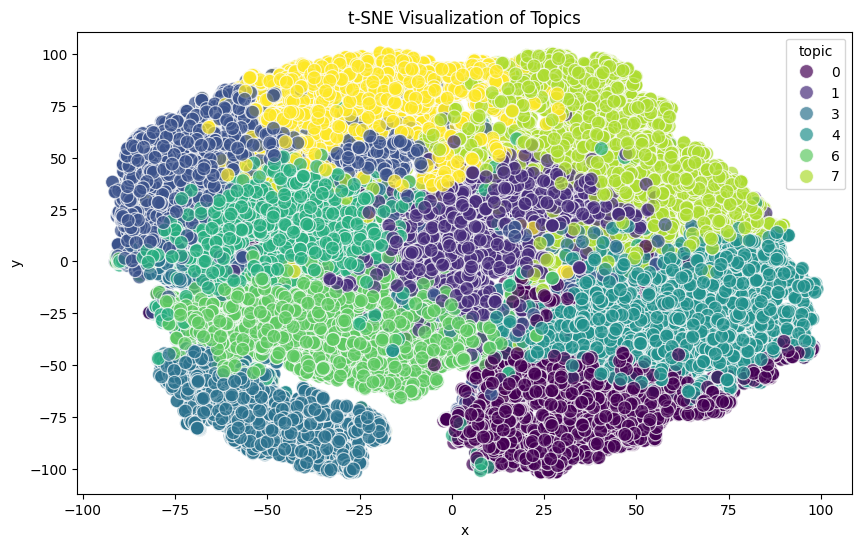

In [19]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# Reduce embeddings to 2D for visualization using t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne_model.fit_transform(reduced_embeddings)

# Create a DataFrame for visualization
df = pd.DataFrame({
    "x": tsne_embeddings[:, 0],
    "y": tsne_embeddings[:, 1],
    "topic": cluster_labels
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="x", y="y", hue="topic", palette="viridis", s=100, alpha=0.7)
plt.title("t-SNE Visualization of Topics")
plt.show()


### Using BERTopic with default models

In [20]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=7, min_dist=0.0, metric='cosine', random_state=42)

In [27]:
# Form clusters using HDBSCAN
from sklearn.cluster import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

In [45]:
# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    verbose=True)
topic_model.fit(abstracts, reduced_embeddings)

2025-02-24 05:12:57,842 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-24 05:15:37,427 - BERTopic - Dimensionality - Completed ✓
2025-02-24 05:15:37,431 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-24 05:15:57,703 - BERTopic - Cluster - Completed ✓
2025-02-24 05:15:57,715 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-24 05:16:14,391 - BERTopic - Representation - Completed ✓


In [46]:
topic_model.get_topic_info()

Topic  Count                                             Name  \
0       -1    854                       -1_model_models_cell_cells   
1        0   5239                     0_covid_covid 19_19_epidemic   
2        1   3266                   1_brain_fmri_visual_functional   
3        2   2075            2_cooperation_game_games_evolutionary   
4        3   1657            3_species_boolean_networks_ecological   
..     ...    ...                                              ...   
134    133     52                   133_neural_network_brain_cells   
135    134     51                   134_tumor_reaction_cell_cancer   
136    135     51   135_granular_granular media_uncertainty_sloppy   
137    136     51           136_bet_bet hedging_hedging_extinction   
138    137     50  137_hybridization_probes_microarray_microarrays   

                                        Representation  \
0    [model, models, cell, cells, information, data...   
1    [covid, covid 19, 19, epidemic, population, in...   
2    [brain, fmri, visual, functional, human, cogni...   
3    [cooperation, game, games, evolutionary, playe...   
4    [species, boolean, networks, ecological, syste...   
..                                                 ...   
134  [neural, network, brain, cells, slam, latent, ...   
135  [tumor, reaction, cell, cancer, tumor growth, ...   
136  [granular, granular media, uncertainty, sloppy...   
137  [bet, bet hedging, hedging, extinction, popula...   
138  [hybridization, probes, microarray, microarray...   

                                   Representative_Docs  
0    [  Advances in single-cell omics allow for unp...  
1    [  After the detection of coronavirus disease ...  
2    [  The application of deep learning (DL) model...  
3    [  In the context of Evolutionary Game Theory,...  
4    [  The distributions of species lifetimes and ...  
..                                                 ...  
134  [  Epilepsy is a network disease. The epilepti...  
135  [  The physics of solid tumor growth can be co...  
136  [  Achieving effective locomotion on diverse t...  
137  [  Bet-hedging is a phenotype diversification ...  
138  [  The lack of specificity in microarray exper...  

[139 rows x 5 columns]

In [47]:
# Visualize the most common topics as a bar chart
topic_model.visualize_barchart()  # Adjust `top_n_topics` as needed

In [32]:
topic_model.visualize_topics()

In [33]:
topic_model.visualize_hierarchy()

In [48]:
# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

In [49]:
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, custom_labels=True)

In [50]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):
        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]
    return df

In [51]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [52]:
from bertopic.representation import KeyBERTInspired
# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

In [53]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0      covid | covid 19 | 19 | epidemic | population   
1      1         brain | fmri | visual | functional | human   
2      2  cooperation | game | games | evolutionary | pl...   
3      3  species | boolean | networks | ecological | sy...   
4      4                cov | sars | sars cov | data | gene   

                                             Updated  
0  epidemic | pandemic | dynamics | outbreak | sp...  
1  fmri | brain | neuroscience | networks | neuro...  
2  cooperation | evolution | evolutionary | coope...  
3  coexistence | ecology | ecosystems | dynamics ...  
4            omics | genomic | gwas | genes | genome

In [54]:
from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.2)
topic_model.update_topics(abstracts, representation_model=representation_model)

In [55]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0      covid | covid 19 | 19 | epidemic | population   
1      1         brain | fmri | visual | functional | human   
2      2  cooperation | game | games | evolutionary | pl...   
3      3  species | boolean | networks | ecological | sy...   
4      4                cov | sars | sars cov | data | gene   

                                             Updated  
0  covid | epidemic | population | model | infection  
1         brain | fmri | visual | neural | cognitive  
2  cooperation | game | games | evolutionary | st...  
3  species | networks | boolean | ecological | sy...  
4          sars | data | genes | analysis | variants

In [57]:
from transformers import pipeline
from bertopic.representation import TextGeneration

prompt = """I have a topic that contains the following documents: [DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the documents and keywords, what is this topic about?"""

# Update our topic representations using Flan-T5
generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(generator, prompt=prompt, doc_length=50, tokenizer="whitespace")
topic_model.update_topics(abstracts, representation_model=representation_model)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 139/139 [00:12<00:00, 10.95it/s]


In [58]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0      covid | covid 19 | 19 | epidemic | population   
1      1         brain | fmri | visual | functional | human   
2      2  cooperation | game | games | evolutionary | pl...   
3      3  species | boolean | networks | ecological | sy...   
4      4                cov | sars | sars cov | data | gene   

                    Updated  
0      epidemic |  |  |  |   
1  Science/Tech |  |  |  |   
2  Science/Tech |  |  |  |   
3  Science/Tech |  |  |  |   
4  Science/Tech |  |  |  |

In [59]:
import openai
from bertopic.representation import OpenAI
prompt = """I have a topic that contains the following documents:[DOCUMENTS]
 The topic is described by the following keywords: [KEYWORDS]
 Based on the information above, extract a short topic label in the following format:
 topic: <short topic label>
 """
# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="YOUR_KEY_HERE")
representation_model = OpenAI(client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt)
topic_model.update_topics(abstracts,
representation_model=representation_model)
# Show topic differences
topic_differences(topic_model, original_topics)

  0%|          | 0/139 [00:00<?, ?it/s]


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: YOUR_KEY*HERE. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [ ]:
# Visualize topics and documents
 fig = topic_model.visualize_document_datamap(
    titles,
    topics=list(range(20)),
    reduced_embeddings=reduced_embeddings,
    width=1200,
    label_font_size=11,
    label_wrap_width=20,
    use_medoids=
 True
 ,
 )